In [19]:
!pip install keras_tuner
from tensorflow import keras
import keras_tuner
import os
import shutil
import numpy as np

In [ ]:
!unzip /content/Spectrograms.zip

In [9]:
main_dataset_dir='/content/content/Spectrograms'
train_dir='/content/train'
test_dir='/content/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

test_set_percentage=0.22

In [10]:
for category in os.listdir(main_dataset_dir):
  os.makedirs('/content/train/{}'.format(category), exist_ok=True)
  os.makedirs('/content/test/{}'.format(category), exist_ok=True)

##Splitting images into Train and Test directories

In [11]:
for category in os.listdir(main_dataset_dir):
  print("{}".format(category))
  img_dirs=os.listdir(main_dataset_dir+ '/{}'.format(category))
  print(img_dirs)
  print(len(img_dirs))
  for img_path in img_dirs[0:int(len(img_dirs)*(1-test_set_percentage))]:
    shutil.move(main_dataset_dir+'/{}/'.format(category)+img_path, train_dir+'/{}'.format(category))

Calm
['03-01-02-01-01-01-04.png', '03-01-02-02-01-02-21.png', '03-01-02-01-02-01-06.png', '03-01-02-02-02-01-07.png', '03-01-02-01-02-02-19.png', '03-01-02-02-01-02-19.png', '03-01-02-02-01-01-01.png', '03-01-02-02-02-01-15.png', '03-01-02-02-01-02-12.png', '03-01-02-02-01-01-06.png', '03-01-02-01-01-01-02.png', '03-01-02-01-01-01-11.png', '03-01-02-02-02-02-15.png', '03-01-02-02-01-02-05.png', '03-01-02-02-02-01-12.png', '03-01-02-01-01-01-19.png', '03-01-02-02-02-01-02.png', '03-01-02-02-01-02-10.png', '03-01-02-02-01-02-13.png', '03-01-02-02-01-01-07.png', '03-01-02-02-01-01-11.png', '03-01-02-01-02-01-07.png', '03-01-02-02-02-01-21.png', '03-01-02-02-02-02-02.png', '03-01-02-01-01-01-21.png', '03-01-02-02-02-01-04.png', '03-01-02-01-01-02-02.png', '03-01-02-02-01-02-06.png', '03-01-02-01-02-01-04.png', '03-01-02-01-02-02-01.png', '03-01-02-02-02-02-06.png', '03-01-02-01-01-02-12.png', '03-01-02-01-02-01-01.png', '03-01-02-01-02-02-16.png', '03-01-02-02-02-01-24.png', '03-01-02-01-0

In [12]:
for category in os.listdir(main_dataset_dir):
  print("{}".format(category))
  img_dirs=os.listdir(main_dataset_dir+ '/{}'.format(category))
  print(img_dirs)
  print(len(img_dirs))
  for img_path in img_dirs:
    shutil.move(main_dataset_dir+'/{}/'.format(category)+img_path, test_dir+'/{}'.format(category))

Calm
['03-01-02-01-01-02-15.png', '03-01-02-01-01-02-11.png', '03-01-02-02-02-02-13.png', '03-01-02-02-02-02-16.png', '03-01-02-01-02-02-15.png', '03-01-02-02-01-01-10.png', '03-01-02-01-02-02-07.png', '03-01-02-02-01-01-21.png', '03-01-02-02-02-01-18.png', '03-01-02-01-01-01-07.png', '03-01-02-01-01-02-07.png', '03-01-02-02-02-01-10.png', '03-01-02-02-01-01-12.png', '03-01-02-01-01-02-21.png', '03-01-02-01-02-02-04.png', '03-01-02-01-01-01-06.png', '03-01-02-02-01-01-17.png', '03-01-02-02-01-02-04.png', '03-01-02-02-02-01-06.png', '03-01-02-01-02-02-13.png', '03-01-02-02-02-02-24.png', '03-01-02-02-02-02-19.png', '03-01-02-02-01-02-01.png', '03-01-02-01-01-01-15.png', '03-01-02-01-02-02-06.png', '03-01-02-01-01-01-01.png', '03-01-02-01-02-01-05.png', '03-01-02-01-02-01-11.png', '03-01-02-01-01-01-05.png', '03-01-02-02-01-01-04.png']
30
Surprise
['03-01-08-01-02-01-24.png', '03-01-08-02-01-01-24.png', '03-01-08-01-02-02-02.png', '03-01-08-02-01-02-01.png', '03-01-08-01-02-01-10.png', '

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from keras.optimizers.legacy import Adam
from keras.losses import SparseCategoricalCrossentropy


In [34]:
train_data_gen=ImgDataGen()
test_data_gen=ImgDataGen()

In [35]:
train_set=train_data_gen.flow_from_directory(train_dir,target_size=(100,300), batch_size=8,color_mode='rgb', class_mode='sparse')

Found 776 images belonging to 8 classes.


In [36]:
test_set=test_data_gen.flow_from_directory(test_dir,target_size=(100,300), batch_size=8,color_mode='rgb', class_mode='sparse')

Found 224 images belonging to 8 classes.


In [38]:

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(100,300, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,300, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(100,300, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [39]:
model.summary()
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 298, 16)       448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 49, 149, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 147, 32)       4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 23, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 71, 16)        4624      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 10, 35, 16)       

In [40]:
history=model.fit(train_set, epochs=70, steps_per_epoch=776//88)


Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 3s 212ms/step - loss: 36.3773 - acc: 0.1406
Epoch 2/70
8/8 [==============================] - 2s 213ms/step - loss: 4.7497 - acc: 0.2500
Epoch 3/70
8/8 [==============================] - 2s 212ms/step - loss: 2.2500 - acc: 0.1875
Epoch 4/70
8/8 [==============================] - 2s 216ms/step - loss: 2.0621 - acc: 0.2188
Epoch 5/70
8/8 [==============================] - 2s 267ms/step - loss: 1.9614 - acc: 0.2656
Epoch 6/70
8/8 [==============================] - 3s 329ms/step - loss: 2.0253 - acc: 0.2656
Epoch 7/70
8/8 [==============================] - 2s 212ms/step - loss: 1.9058 - acc: 0.3281
Epoch 8/70
8/8 [==============================] - 2s 214ms/step - loss: 1.8864 - acc: 0.3906
Epoch 9/70
8/8 [==============================] - 2s 209ms/step - loss: 1.8739 - acc: 0.4062
Epoch 10/70
8/8 [==============================] - 2s 212ms/step - loss: 1.8032 - acc: 0.3750
Epoch 11/70
8/8 [==============================] - 3s 372ms/step - loss: 1.7941

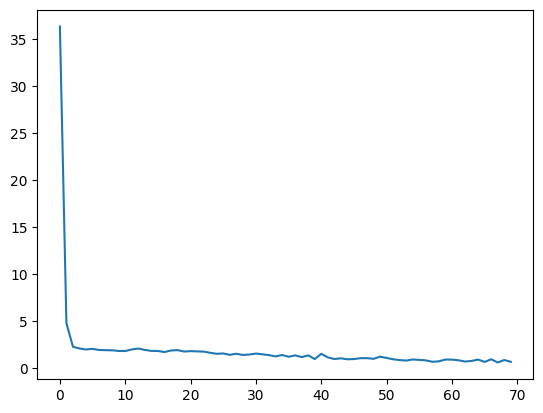

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

28/28 [==============================] - 3s 114ms/step - loss: 2.1100 - acc: 0.3750


[2.1099870204925537, 0.375]